In [111]:
# Imports
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [4]:
# Fetch Data
mnist = fetch_openml('mnist_784', version=1)

In [9]:
pixel_features = mnist['data']
data_labels = mnist['target']

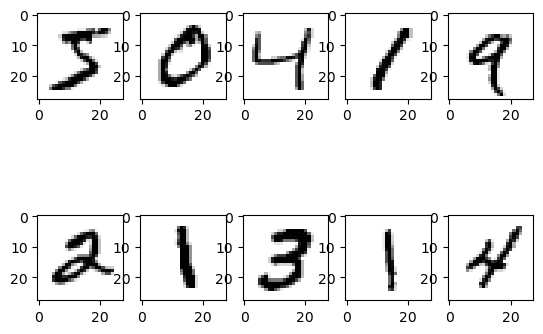

In [41]:
# View the Data
fig = plt.figure()
rows = 2
columns = 5
for i in range(rows * columns):
    fig.add_subplot(rows, columns, i + 1)
    # Each row corresponds to the pixels of the photo 
    # Need to reshape to a 28x28 array
    plt.imshow(pixel_features.iloc[i].to_numpy().reshape(28, 28), cmap='binary')

In [91]:
# Train, Holdout Set Split
x_train = pixel_features.sample(frac=0.90, random_state=13)
x_holdout = pixel_features.drop(x_train.index)
y_train = data_labels.iloc[x_train.index]
y_holdout = data_labels.drop(y_train.index)

In [92]:
x_train.shape, y_train.shape

((63000, 784), (63000,))

array([0.98      , 0.9747619 , 0.97611111, 0.97753968, 0.97468254])

In [114]:
def run_model_for_int(
        train_labels: pd.Series,
        target_int: int,
        cv: int = 5,
        scoring: str = 'accuracy'
):
    int_labels = (train_labels == str(target_int)) 
    # Train with Stochastic Gradient Descent
    temp_model = SGDClassifier(random_state=13)
    model_score = np.mean(
        cross_val_score(
            estimator=temp_model,
            X=x_train,
            y=int_labels,
            cv=cv,
            scoring=scoring,
        )
    )
    # TODO: return model and run holdout test
    return model_score
    

In [ ]:
model_results = {}
for i in range(10):
    model_results[str(i)] = run_model_for_int(
        train_labels=y_train,
        target_int=i,
        cv=5,
        scoring='accuracy'
    )
print(model_results)